<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Draw_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, axis=-1) / 255
x_test  = np.expand_dims(x_test , axis=-1) / 255

y_train = tf.keras.utils.to_categorical(y=y_train, num_classes=10)
y_test  = tf.keras.utils.to_categorical(y=y_test , num_classes=10)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

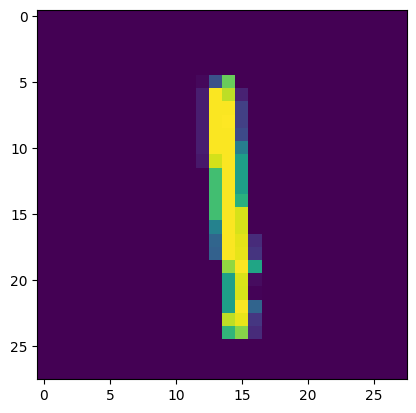

In [7]:
g = plt.imshow(x_train[8][:,:,0])

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    # tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                       

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            #  metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.AUC(), tf.keras.metrics.CategoricalAccuracy()]
              metrics=['accuracy']
              )

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.4f}-{categorical_accuracy:0.4f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')]


history=model.fit(x=x_train,
                  y=y_train,
                  epochs=50,
                  verbose=1,
                  batch_size=32,
                  callbacks=my_callbacks,
                  validation_data=(x_test, y_test))


model.evaluate(x_test, y_test)
model.save("my_model.h5")

Epoch 1/50
  64/1875 [>.............................] - ETA: 2:51 - loss: 1.9669 - accuracy: 0.3779

In [ ]:
del model

In [ ]:
import os

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.CategoricalCrossentropy(),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.AUC(), tf.keras.metrics.CategoricalAccuracy()])

# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=["accuracy"],
# )

model = tf.keras.models.load_model('my_model.h5')

def classify_image(image):
    if len(np.array(image).shape) == 3:
      image = tf.image.rgb_to_grayscale(image)
    image_tensor = tf.convert_to_tensor(image)
    image_tensor = tf.cast(image_tensor, tf.float32)
    image_tensor = tf.expand_dims(image_tensor, 0)
    image_tensor = image_tensor / 255.0
    prediction = model.predict(image_tensor)
    prediction_label = str(prediction.argmax())

    return prediction_label

title = "Draw to Search"
description = "Using the power of AI to detect the number you draw!"
article = "for source code you can visit [my github](https://github.com/mralamdari)"

example_list = [["examples/" + example] for example in os.listdir("examples")]

interface = gr.Interface(fn=classify_image,
                          inputs=gr.Image(type="pil"),
                          outputs=gr.Label(num_top_classes=3, label="Predictions"),
                          examples=example_list,
                          title=title,
                          description=description,
                          article=article)

interface.launch()

In [ ]:
classify_image()

In [ ]:
img = np.zeros(shape=(28, 28))
for i in range(img.shape[0]):
  for j in range(img.shape[0]):
    if np.random.rand()<0.5:
      img[i][j] = 1

In [ ]:
classify_image(img)

1/1 [==============================] - 0s 372ms/step


'1'